In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import time
import itertools
from NEF_RL import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

## All SIDs

In [6]:
rln2 = pd.read_pickle("data/RL_n2_carrabin_feb10meanstd_dynamics.pkl")
target_alphas = pd.read_pickle("data/RL_n2_carrabin_feb10meanstd_params.pkl")['mu'].to_numpy()
nef = pd.read_pickle("data/NEF_RL_carrabin_feb10one_dynamics.pkl")
human = pd.read_pickle("data/carrabin.pkl")
dfs = [human, rln2, nef]
combined = pd.concat(dfs, ignore_index=True)

In [7]:
combined['excursion'] = None
for sid in human['sid'].unique():
    print(sid)
    subdata = combined.query("sid==@sid")
    for i, row in subdata.iterrows():
        mt = row['type']
        sid = row['sid']
        qid = row['qid']
        response = row['response']
        avg_response = subdata.query("type==@mt & sid==@sid & qid==@qid")['response'].mean()
        combined.at[i, 'excursion'] = response - avg_response
combined.to_pickle("data/alphas_RLn2_NEF_RL_neurons.pkl")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


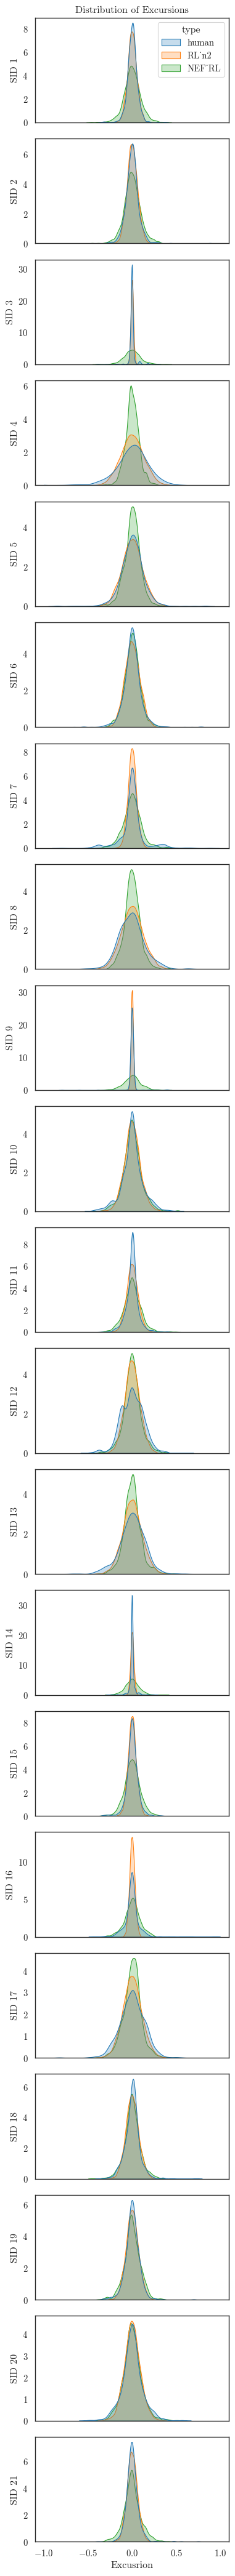

In [8]:
sids = human['sid'].unique()
fig, axes = plt.subplots(nrows=len(sids), ncols=1, figsize=(4, 2*len(sids)), sharex=True)
for s, sid in enumerate(sids):
    sns.kdeplot(combined.query("sid==@sid"), x='excursion', hue='type', ax=axes[s],
                clip=[-1, 1], palette=palette[:3], fill=True, common_norm=False)
    axes[s].set(ylabel=f"SID {sid}")  # , ylim=[0, 20]
    if s>0: axes[s].get_legend().remove()
axes[0].set(title='Distribution of Excursions')
axes[-1].set(xlabel='Excusrion')
plt.tight_layout()
fig.savefig("plots/excursion_distributions_all_sids.jpg", dpi=600)

### One SID

In [11]:
def plotz(sid):
    rln = pd.read_pickle(f"data/RL_n2_carrabin_{sid}_dynamics.pkl")
    nef = pd.read_pickle(f"data/NEF_RL_carrabin_{sid}_dynamics.pkl")
    target_alphas = pd.read_pickle(f"data/RL_n2_carrabin_{sid}_params.pkl")['mu'].to_numpy()
    human = pd.read_pickle("data/carrabin.pkl").query("sid==@sid")
    dfs = [human, rln, nef]
    combined = pd.concat(dfs, ignore_index=True)
    combined['excursion'] = None
    for i, row in combined.iterrows():
        mt = row['type']
        qid = row['qid']
        response = row['response']
        avg_response = combined.query("type==@mt & qid==@qid")['response'].mean()
        combined.at[i, 'excursion'] = response - avg_response
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), sharex=True)
    sns.kdeplot(combined, x='excursion', hue='type', ax=ax, clip=[-1, 1], palette=palette[:3], fill=True, common_norm=False)
    ax.set(ylabel=f"SID {sid}")
    ax.set(title='Distribution of Excursions')
    ax.set(xlabel='Excusrion')
    plt.tight_layout()

### 1

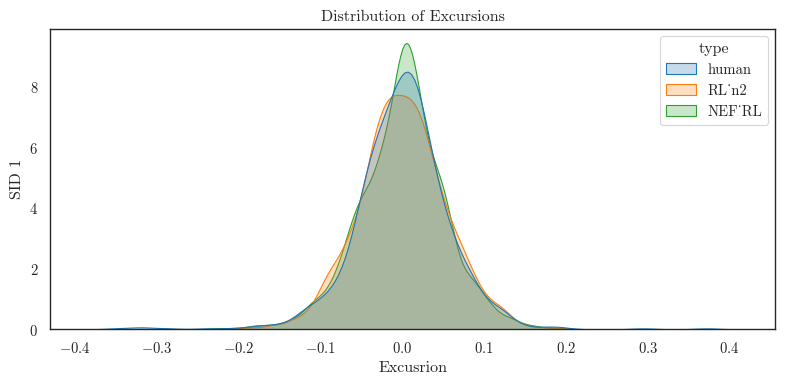

In [16]:
plotz(1)  # 400, dim2

### 4

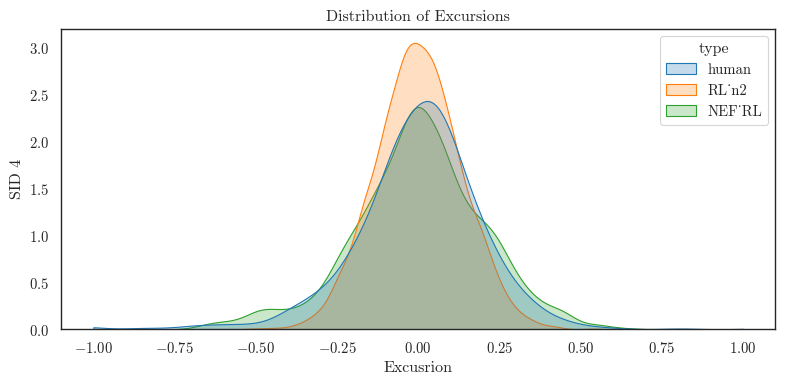

In [17]:
plotz(4)  # 40, dim2

### 9

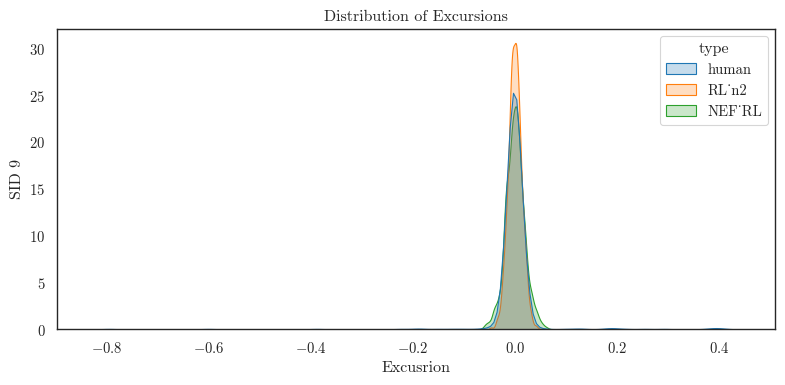

In [19]:
plotz(9)  # 2000, dim2

In [33]:
def three_plotz(sids):
    dfs = []
    for sid in sids:
        dfs.append(pd.read_pickle("data/carrabin.pkl").query("sid==@sid"))
        dfs.append(pd.read_pickle(f"data/RL_n2_carrabin_{sid}_dynamics.pkl"))
        dfs.append(pd.read_pickle(f"data/NEF_RL_carrabin_sid{sid}excursion_dynamics.pkl"))
    combined = pd.concat(dfs, ignore_index=True)
    combined['excursion'] = None
    for i, row in combined.iterrows():
        mt = row['type']
        qid = row['qid']
        response = row['response']
        sid = row['sid']
        avg_response = combined.query("type==@mt & sid==@sid & qid==@qid")['response'].mean()
        combined.at[i, 'excursion'] = response - avg_response

    types = combined['type'].unique()
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6), sharex=True, sharey=True)
    for s, sid in enumerate(sids):
        sns.kdeplot(combined.query("sid==@sid"), x='excursion', hue='type', ax=axes[s], clip=[-1, 1], palette=palette[:3], fill=True, common_norm=False)
        axes[s].set(ylabel=f"SID {sid}", ylim=[0, 30])
        # if s>0: axes[s].get_legend().remove()
    axes[0].set(title='Distribution of Excursions')
    axes[-1].set(xlabel='Excursion', xlim=[-0.4, 0.4])
    plt.tight_layout()
    fig.savefig("plots/three_excursions.jpg", dpi=600)

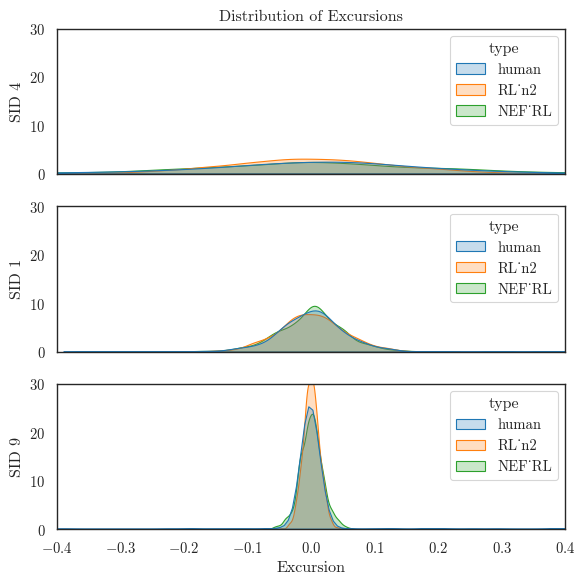

In [34]:
three_plotz([4,1,9])